In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
#import plotly.graph_objects as go
from torch.autograd import Variable

In [2]:
#Data Sources
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_cases_data_url = base_url + 'time_series_covid19_confirmed_global.csv'
death_cases_data_url = base_url + 'time_series_covid19_deaths_global.csv'
recovery_cases_data_url = base_url+ 'time_series_covid19_recovered_global.csv'
name_country = "US"

In [3]:
raw_conf_df = pd.read_csv(confirmed_cases_data_url, index_col="Country/Region")
raw_death_df = pd.read_csv(death_cases_data_url, index_col="Country/Region") 
raw_rec_df = pd.read_csv(recovery_cases_data_url, index_col="Country/Region")


In [4]:
raw_conf_df.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.0000,65.0000,0,0,0,0,0,0,0,...,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594
Albania,NaN,41.1533,20.1683,0,0,0,0,0,0,0,...,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106
Algeria,NaN,28.0339,1.6596,0,0,0,0,0,0,0,...,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348
Andorra,NaN,42.5063,1.5218,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
Angola,NaN,-11.2027,17.8739,0,0,0,0,0,0,0,...,276,284,291,315,328,346,346,346,386,386


In [5]:
raw_death_df.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.0000,65.0000,0,0,0,0,0,0,0,...,733,746,774,807,819,826,864,898,920,936
Albania,NaN,41.1533,20.1683,0,0,0,0,0,0,0,...,58,62,65,69,72,74,76,79,81,83
Algeria,NaN,28.0339,1.6596,0,0,0,0,0,0,0,...,905,912,920,928,937,946,952,959,968,978
Andorra,NaN,42.5063,1.5218,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
Angola,NaN,-11.2027,17.8739,0,0,0,0,0,0,0,...,11,13,15,17,18,19,19,19,21,21


In [6]:
raw_rec_df.head()


,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.0000,65.0000,0,0,0,0,0,0,0,...,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700
Albania,NaN,41.1533,20.1683,0,0,0,0,0,0,0,...,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791
Algeria,NaN,28.0339,1.6596,0,0,0,0,0,0,0,...,9674,9897,10040,10342,10832,11181,11492,11884,12094,12329
Andorra,NaN,42.5063,1.5218,0,0,0,0,0,0,0,...,799,799,799,800,800,800,800,800,800,802
Angola,NaN,-11.2027,17.8739,0,0,0,0,0,0,0,...,93,93,97,97,107,108,108,108,117,117


In [7]:
us_conf = raw_conf_df.loc[name_country]
us_deaths = raw_death_df.loc[name_country]
us_rec = raw_rec_df.loc[name_country]

In [8]:
us_conf

Province/State        NaN
Lat               37.0902
Long             -95.7129
1/22/20                 1
1/23/20                 1
                   ...   
7/4/20            2841241
7/5/20            2891124
7/6/20            2936077
7/7/20            2996098
7/8/20            3054699
Name: US, Length: 172, dtype: object

In [9]:
us_conf[3:]

1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
            ...   
7/4/20     2841241
7/5/20     2891124
7/6/20     2936077
7/7/20     2996098
7/8/20     3054699
Name: US, Length: 169, dtype: object

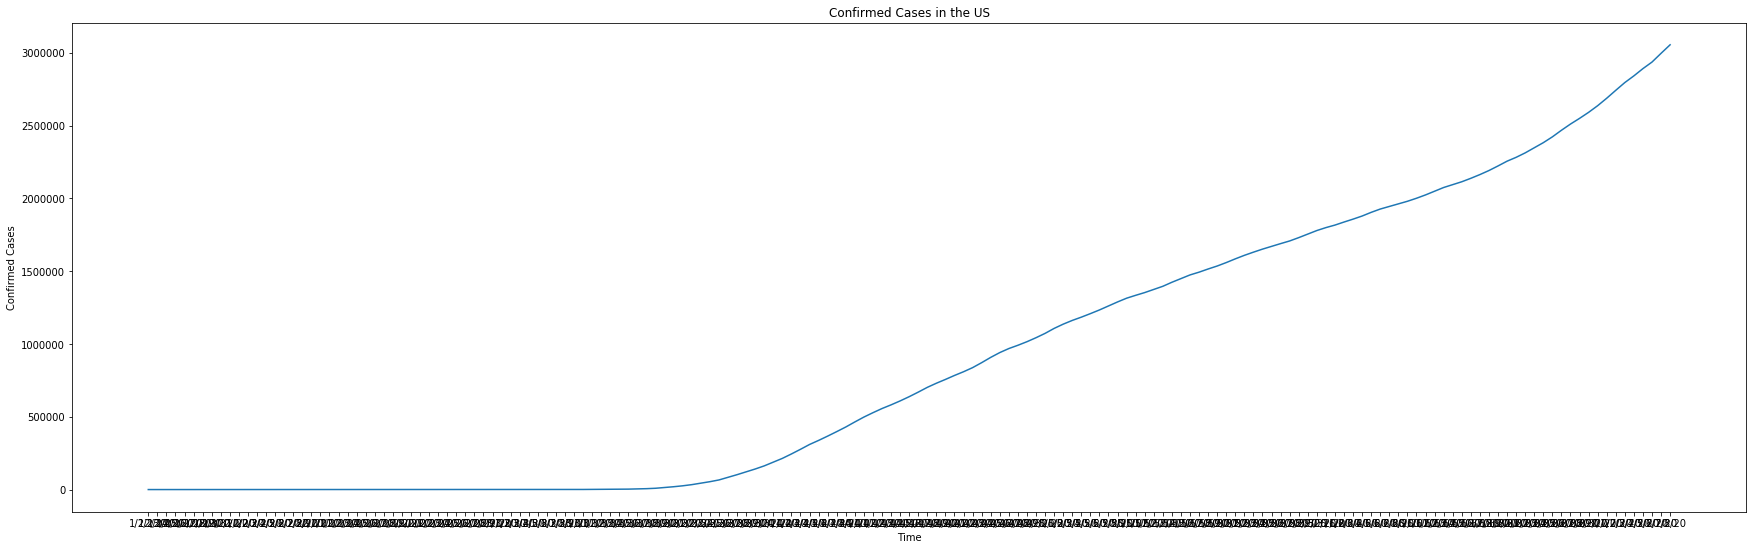

In [10]:
plt.figure(figsize=(30,9))
plt.title("Confirmed Cases in the US")
plt.xlabel("Time")
plt.ylabel("Confirmed Cases")
plt.plot(raw_conf_df.columns[3:], us_conf[3:])

In [11]:
"""fig = go.Figure(data=[
    go.Scatter(
        name="Confirmed Cases",
        x=raw_conf_df.columns[3:],
        y=us_conf[3:]
    ),
    go.Scatter(
        name="Confirmed Deaths",
        x=raw_death_df.columns[3:],
        y=us_deaths[3:]
    ),
    go.Scatter(
        name="Confirmed Recoveries",
        x=raw_rec_df.columns[3:],
        y=us_rec[3:]
    )

])
# fig.update_yaxes(type="log")

fig.show()"""

'fig = go.Figure(data=[\n    go.Scatter(\n        name="Confirmed Cases",\n        x=raw_conf_df.columns[3:],\n        y=us_conf[3:]\n    ),\n    go.Scatter(\n        name="Confirmed Deaths",\n        x=raw_death_df.columns[3:],\n        y=us_deaths[3:]\n    ),\n    go.Scatter(\n        name="Confirmed Recoveries",\n        x=raw_rec_df.columns[3:],\n        y=us_rec[3:]\n    )\n\n])\n# fig.update_yaxes(type="log")\n\nfig.show()'

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
result = adfuller(us_conf[3:].values)

In [14]:
result

(2.5970863779098403,
 0.9990746105663427,
 10,
 158,
 {'1%': -3.4724305215713156,
  '5%': -2.8800127935315465,
  '10%': -2.576619230892485},
 2805.1127971910646)

In [15]:
# Comparing the test statistic to the critical values, 
#it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and 
#does have time-dependent structure.
#Non-Stationary

In [16]:
import math
from sklearn.preprocessing import MinMaxScaler
#Preprocess Data
train_size = 0.9
total_data = np.array(us_conf[3:].values).reshape(-1,1)
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(total_data)
#train_data = data_norm[:math.floor(train_size*len(total_data))]

In [17]:
def sliding_window(data, seq_length,out_seq_length):
  x = []
  y = []

  for i in range(len(data)-seq_length-1):
    if ((i+seq_length+out_seq_length)<len(data)):
      _x = data[i:(i+seq_length)]
      _y = data[i+seq_length+out_seq_length]
      x.append(_x)
      y.append(_y)

  return np.array(x), np.array(y)

X, y = sliding_window(data_norm, 30, 14)

#X = X.reshape(122,30)
#y = y.reshape(122)
print(X.shape)
print(y.shape)

(125, 30, 1)
(125, 1)


In [18]:
dataX = Variable(torch.Tensor(np.array(X)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(X[0:math.floor(train_size*123)])))
trainY = Variable(torch.Tensor(np.array(y[0:math.floor(train_size*123)])))

testX = Variable(torch.Tensor(np.array(X[math.floor(train_size*123):len(X)])))
testY = Variable(torch.Tensor(np.array(y[math.floor(train_size*123):len(y)])))
print(testY.size())

torch.Size([15, 1])


In [19]:
"""
class LSTM(nn.Module):
 
    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1,
                    num_layers=2):
      super(LSTM, self).__init__()
      self.input_dim = input_dim
      self.hidden_dim = hidden_dim
      self.batch_size = batch_size
      self.num_layers = num_layers

      # Define the LSTM layer
      self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers)

      # Define the output layer
      self.linear = nn.Linear(self.hidden_dim, output_dim)

    def init_hidden(self):
      return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
              torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))
      
    def forward(self, input):
      lstm_out, _ = self.lstm((self.input_dim, self.batch_size, -1))
      y_pred = self.linear(lstm_out[-1].view(self.batch_size, -1))
      return y_pred.view(-1)
"""
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        #print(x.view())
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

h1 = 128
lstm_input_size = 1
output_dim = 1
num_layers = 1
batch_size = 4
model = LSTM(output_dim, lstm_input_size, h1,num_layers, 30)
print(model)

LSTM(
  (lstm): LSTM(1, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)


In [20]:
loss_fn = torch.nn.MSELoss(size_average=False)
learning_rate = 0.001
optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)

#####################
# Train model
#####################
num_epochs = 5000
hist = np.zeros(num_epochs)

for t in range(num_epochs):
    # Clear stored gradient
    model.zero_grad()
    
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_pred = model.forward(trainX)
    #print(y_pred)

    loss = loss_fn(y_pred, trainY)
    #print(loss)
    if t % 100 == 0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

C:\Users\Rsumi\Anaconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch  0 MSE:  25.013168334960938
Epoch  100 MSE:  0.4538770318031311
Epoch  200 MSE:  0.18441197276115417
Epoch  300 MSE:  0.139550119638443
Epoch  400 MSE:  0.1667891889810562
Epoch  500 MSE:  0.08905468881130219
Epoch  600 MSE:  0.13314323127269745
Epoch  700 MSE:  0.22650185227394104
Epoch  800 MSE:  0.17441122233867645
Epoch  900 MSE:  0.13625690340995789
Epoch  1000 MSE:  0.12384631484746933
Epoch  1100 MSE:  0.11569909006357193
Epoch  1200 MSE:  0.10627476871013641
Epoch  1300 MSE:  0.08632457256317139
Epoch  1400 MSE:  0.10642701387405396
Epoch  1500 MSE:  0.093479223549366
Epoch  1600 MSE:  0.06882600486278534
Epoch  1700 MSE:  0.3603956401348114
Epoch  1800 MSE:  0.1479877382516861
Epoch  1900 MSE:  0.19987007975578308
Epoch  2000 MSE:  0.11529591679573059
Epoch  2100 MSE:  0.09901576489210129
Epoch  2200 MSE:  0.08898507058620453
Epoch  2300 MSE:  0.07756809145212173
Epoch  2400 MSE:  0.7981275320053101
Epoch  2500 MSE:  0.2254413515329361
Epoch  2600 MSE:  0.175662025809288

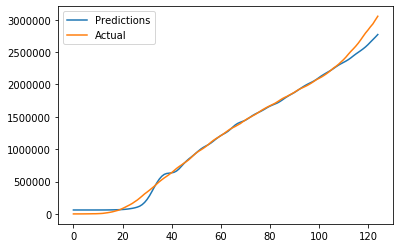

In [22]:
pred_data = model(dataX).data.numpy()
plt.plot(range(dataX.size(0)), scaler.inverse_transform(pred_data), label="Predictions")
plt.plot(range(dataX.size(0)), scaler.inverse_transform(dataY.data.numpy()), label="Actual")
plt.legend()

In [24]:
#Vector Auto Regressive Model
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str
dt = {
    "Confirmed" : us_conf[3:],
    "Deaths" : us_deaths[3:],
    "Recovered" : us_rec[3:]
}
df = pd.DataFrame(dt, columns=["Confirmed", "Deaths", "Recovered"])
df.index = pd.DatetimeIndex(dates_from_str(df.index))
df = df.astype("float")
df.head()

,Confirmed,Deaths,Recovered
2020-01-22,1.0,0.0,0.0
2020-01-23,1.0,0.0,0.0
2020-01-24,2.0,0.0,0.0
2020-01-25,2.0,0.0,0.0
2020-01-26,5.0,0.0,0.0


In [25]:
model = VAR(np.array(df))
results = model.fit()

In [26]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 09, Jul, 2020
Time:                     17:54:47
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    46.6224
Nobs:                     168.000    HQIC:                   46.4898
Log likelihood:          -4600.68    FPE:                1.41562e+20
AIC:                      46.3992    Det(Omega_mle):     1.31914e+20
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const      2196.310701       503.049627            4.366           0.000
L1.y1         1.125734         0.004334          259.741           0.000
L1.y2        -1.371804         0.057484          -23.864           0.000
L1.y3        -0.147945

In [27]:
!pip freeze > requirements.txt

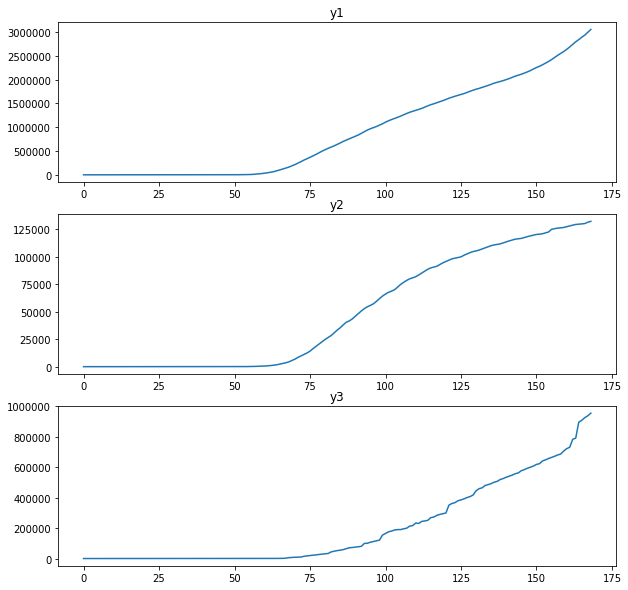

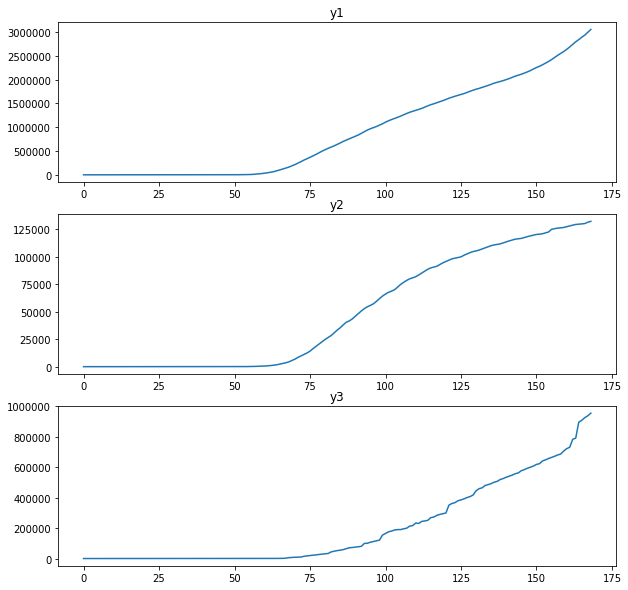

In [28]:
results.plot()

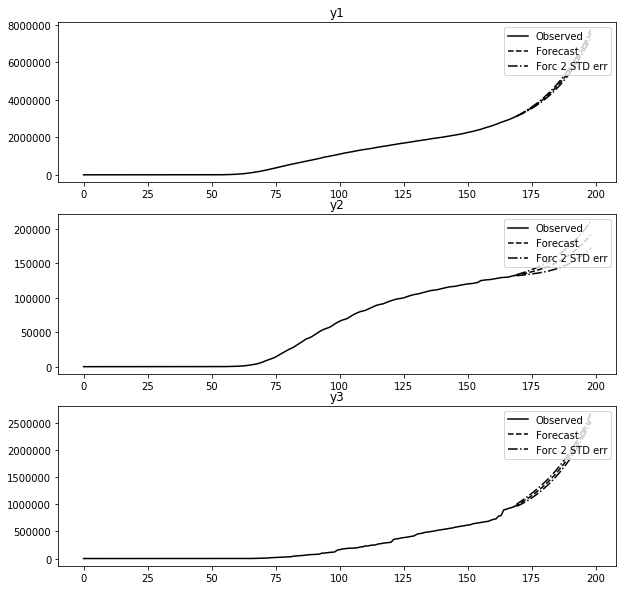

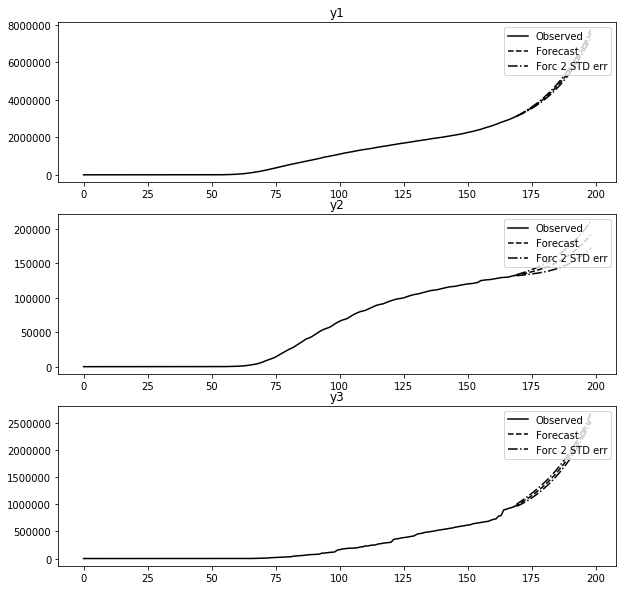

In [29]:
results.plot_forecast(30)